Retrieve data from World Health Organization

In [47]:
import requests

url = "https://ghoapi.azureedge.net/api/HIV_0000000001"

response = requests.get(url)

data = response.json()

countries = []
years = []
rates = []

for item in data['value']:
    countries.append(item['SpatialDim'])
    years.append(item['TimeDim'])
    rates.append(item['NumericValue'])

Create DataFrame with Arrays

In [48]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}

df = pd.DataFrame(data)

to_remove = ['GLOBAL','SEAR','AMR','EUR','AFR']

initial_df = df[~df['Country'].isin(to_remove)]

print(initial_df)

     Country  Year       Rate
3        EMR  2021   430000.0
6        WPR  2021  1900000.0
10       EMR  2020   410000.0
13       WPR  2020  1900000.0
17       EMR  2019   390000.0
...      ...   ...        ...
4487     VEN  2000    50000.0
4488     VNM  2000   120000.0
4489     YEM  2000     2200.0
4490     ZMB  2000   880000.0
4491     ZWE  2000  1600000.0

[4332 rows x 3 columns]


In [49]:
grouped_df = initial_df.groupby(['Year']).sum()
print(grouped_df)

            Rate
Year            
1990    101000.0
1991    132000.0
1992    167000.0
1993    203000.0
1994    330000.0
1995    438000.0
1996    546000.0
1997    635000.0
1998    736000.0
1999    837000.0
2000  24691960.0
2001  25352160.0
2002  25651260.0
2003  26172450.0
2004  26332750.0
2005  26496180.0
2006  26702610.0
2007  27045400.0
2008  27341950.0
2009  27755230.0
2010  29260730.0
2011  29854160.0
2012  30334960.0
2013  30939910.0
2014  31631930.0
2015  32141030.0
2016  32727530.0
2017  33189070.0
2018  33760060.0
2019  34395270.0
2020  33596860.0
2021  33761460.0


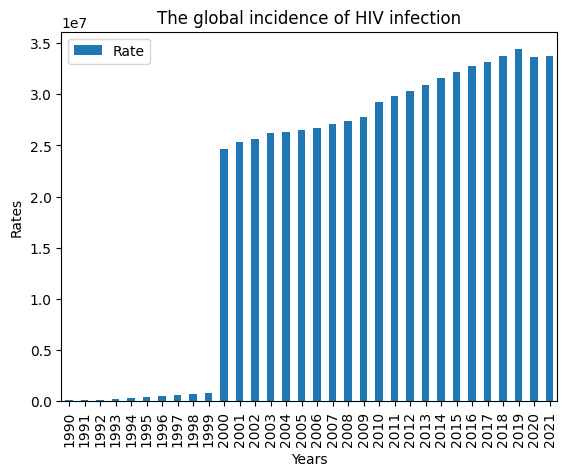

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')
plt.show()

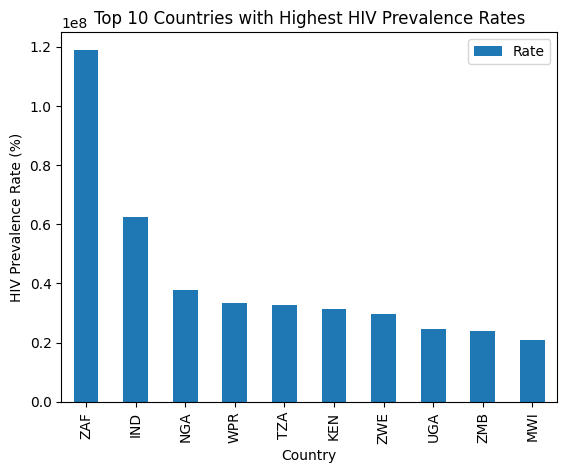

In [52]:
grouped_df = initial_df.groupby('Country').sum().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(10,'Rate')
top_10['Country'] = top_10.index

top_10.plot(kind='bar', x='Country', y='Rate')
plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')

plt.show()